In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#!/global/common/software/lsst/common/miniconda/current/envs/stack/bin/python
# set mode: which class from which to match the hosts
import sys
from sklearn.neighbors import NearestNeighbors
import numpy as np
from matplotlib import pyplot as plt
import os
import GCRCatalogs
from astropy.io import fits
import pandas as pd
from astropy.cosmology import Planck15 as P15
from astropy import units as u
import matplotlib
import time
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
import numpy.ma as ma
import multiprocessing as mp
import sys

In [4]:
cosmo = GCRCatalogs.load_catalog("cosmoDC2_v1.1.4")
features = np.array(['Mag_true_u_lsst_z0', 'Mag_true_g_lsst_z0','Mag_true_r_lsst_z0', 
                    'Mag_true_i_lsst_z0', 'Mag_true_z_lsst_z0', 'Mag_true_Y_lsst_z0', 'galaxy_id'])

obj = pd.read_csv("/global/cscratch1/sd/kessler/SNANA_LSST_SIM/SCOTCH10k/objids.csv")
galaxy_ids = obj['galaxy_id'].values

filters=[(lambda x: np.isin(x, galaxy_ids), 'galaxy_id')]
cdc2_true = {}
for feature in features:
    cdc2_true[feature] = []
c = 0
print(cdc2_true.keys())
start_time = time.time()
for gal in cosmo.get_quantities(features, filters=filters, return_iterator=True):
    for feature in features:
        cdc2_true[feature].append(gal[feature]) 
    elapsed = time.time() - start_time
    print(c, "Elapsed time = ", elapsed)
    c+=1
for feature in features:
    cdc2_true[feature] = np.concatenate(cdc2_true[feature])

cdc2_true = pd.DataFrame(cdc2_true)

dict_keys(['Mag_true_u_lsst_z0', 'Mag_true_g_lsst_z0', 'Mag_true_r_lsst_z0', 'Mag_true_i_lsst_z0', 'Mag_true_z_lsst_z0', 'Mag_true_Y_lsst_z0', 'galaxy_id'])
0 Elapsed time =  0.49617433547973633
1 Elapsed time =  1.282907247543335
2 Elapsed time =  2.099937677383423
3 Elapsed time =  2.882211685180664
4 Elapsed time =  3.727081298828125
5 Elapsed time =  4.573693037033081
6 Elapsed time =  5.415835618972778
7 Elapsed time =  6.247182369232178
8 Elapsed time =  7.072777509689331
9 Elapsed time =  7.928900480270386
10 Elapsed time =  8.719913244247437
11 Elapsed time =  9.50654673576355
12 Elapsed time =  10.246954202651978
13 Elapsed time =  11.049778461456299
14 Elapsed time =  11.854806423187256
15 Elapsed time =  12.551712989807129
16 Elapsed time =  13.323703289031982
17 Elapsed time =  14.104948282241821
18 Elapsed time =  14.94913625717163
19 Elapsed time =  15.689778089523315
20 Elapsed time =  16.46208882331848
21 Elapsed time =  17.248480796813965
22 Elapsed time =  18.05146241

In [5]:
len(cdc2_true.drop_duplicates())

127836

In [ ]:
cdc2_true.to_csv("/global/homes/a/agaglian/LSSTmags.csv",index=False)

In [9]:
DF_head = table.Table.read(fns[0], format='fits').to_pandas()

In [21]:
AGN_ids = []
for fn in fns:
    DF_head = table.Table.read(fn, format='fits').to_pandas()
    AGN_ids.append(DF_head['SIM_HOSTLIB_GALID'].values)
#    break

In [25]:
AGN_ids = np.concatenate(AGN_ids)

In [28]:
len(AGN_ids)

9987

In [31]:
DF_absoluteMags = fullDF[fullDF['galaxy_id'].isin(AGN_ids)].drop_duplicates()

In [32]:
DF_absoluteMags.to_csv("/global/cscratch1/sd/agaglian/AGNHosts_absoluteMags.csv",index=False)

In [21]:
sns.set_context("talk",font_scale=1.5)

sns.set_style('white', {'axes.linewidth': 0.5})
plt.rcParams['xtick.major.size'] = 15
plt.rcParams['ytick.major.size'] = 15

plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['ytick.minor.size'] = 10
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2

plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [22]:
fn_head = '/global/cscratch1/sd/kessler/SNANA_LSST_SIM/ELASTICC_TEST03_LSST_WFD_AGN/ELASTICC_TEST03_LSST_WFD_NONIaMODEL0*_HEAD.FITS.gz'
headfiles = sorted(glob.glob(fn_head))
DF_head = table.Table.read(headfiles[2], format='fits').to_pandas()

In [23]:
DF_head['HOSTGAL_LOGMASS']

0      -9.0
1      -9.0
2      -9.0
3      -9.0
4      -9.0
       ... 
2963   -9.0
2964   -9.0
2965   -9.0
2966   -9.0
2967   -9.0
Name: HOSTGAL_LOGMASS, Length: 2968, dtype: float32

In [38]:
rates = pd.read_csv("/global/homes/a/agaglian/data_files/ScaledModelRates.csv")
ra_trans = {}
dec_trans = {}
z_trans = {}
DF_trans = {}
for idx, row in rates.iterrows():
    fn_head = '/global/cscratch1/sd/kessler/SNANA_LSST_SIM/MLAG_GP_ELASTICC_LSST_FULLSAMPLE/%s/MLAG_GP_ELASTICC_LSST_WFD_NONIaMODEL0*_HEAD.FITS.gz'%row.Model
    headfiles = sorted(glob.glob(fn_head))
    if row.Model == 'MLAG_GP_ELASTICC_LSST_WFD_SNIax':
        fn_head = '/global/cscratch1/sd/kessler/SNANA_LSST_SIM/MLAG_GP_ELASTICC_LSST_FULLSAMPLE/%s/MLAG_GP_ELASTICC_LSST_WFD_Iax_NONIaMODEL0*_HEAD.FITS.gz'%row.Model
        headfiles = sorted(glob.glob(fn_head))
    elif row.Model == 'MLAG_GP_ELASTICC_LSST_WFD_SNIa-91bg':
        fn_head = '/global/cscratch1/sd/kessler/SNANA_LSST_SIM/MLAG_GP_ELASTICC_LSST_FULLSAMPLE/%s/MLAG_GP_ELASTICC_91bg_NONIaMODEL0*_HEAD.FITS.gz'%row.Model
        headfiles = sorted(glob.glob(fn_head))        
    DF_head = table.Table.read(headfiles[0], format='fits').to_pandas()
    ra_trans[row.Model] = []
    dec_trans[row.Model] = []
    z_trans[row.Model] = []
    for j in np.arange(len(headfiles)):
        counter = np.array([len(x) for x in ra_trans[row.Model]])
        counter = np.nansum(counter)
        if counter < row.NLC_Scale:
            ra_trans[row.Model].append(DF_head['RA'])
            dec_trans[row.Model].append(DF_head['DEC'])
            z_trans[row.Model].append(DF_head['REDSHIFT_HELIO'])
        else:
            break
    tempDF = pd.DataFrame({'RA':np.concatenate(ra_trans[row.Model]), 'DEC':np.concatenate(dec_trans[row.Model]), 'z':np.concatenate(z_trans[row.Model])})
    tempDF_cut = tempDF.sample(row.NLC_Scale)
    if len(tempDF_cut) == row.NLC_Scale:
        DF_trans[row.Model] = tempDF_cut
    else:
        print("Error!")
        break

In [47]:
DF_trans

{'MLAG_GP_ELASTICC_LSST_WFD_KN_K17':             RA        DEC         z
 8    21.294518 -47.011828  0.228054
 9   330.500555 -16.818953  0.234352
 13  228.974622  -3.550227  0.159037
 10   86.441893 -15.274910  0.096422
 7    85.959908  -1.143388  0.128453
 5    75.610622 -50.702680  0.196921
 11  133.626930 -20.692728  0.136073
 0   157.609456 -18.306401  0.254144
 3   158.881382 -16.374041  0.146646
 2    84.518677  -3.130438  0.122858
 14  139.442580 -27.644826  0.265043,
 'MLAG_GP_ELASTICC_LSST_WFD_KN_B19':            RA        DEC         z
 8   18.319553 -59.583499  0.234044
 5  330.603580 -30.380589  0.165175
 1    8.008338  -6.341626  0.269805
 2  150.057651 -48.813822  0.116942
 0   17.446570  -2.525113  0.149348
 4   79.822341  -6.994471  0.225979
 9  344.216840 -48.217013  0.163128
 7   15.599683 -41.460475  0.236608
 3  142.165681 -23.574934  0.188097
 6  220.999577 -40.370357  0.175057,
 'MLAG_GP_ELASTICC_LSST_WFD_SLSN-I':               RA        DEC         z
 870   145.

In [51]:
DF_trans.keys()

dict_keys(['MLAG_GP_ELASTICC_LSST_WFD_KN_K17', 'MLAG_GP_ELASTICC_LSST_WFD_KN_B19', 'MLAG_GP_ELASTICC_LSST_WFD_SLSN-I', 'MLAG_GP_ELASTICC_LSST_WFD_TDE', 'MLAG_GP_ELASTICC_LSST_WFD_AGN', 'MLAG_GP_ELASTICC_LSST_WFD_SNIIn-MOSFIT', 'MLAG_GP_ELASTICC_LSST_WFD_SNIIn+HostXT_V19', 'MLAG_GP_ELASTICC_LSST_WFD_SNII-NMF', 'MLAG_GP_ELASTICC_LSST_WFD_SNII-Templates', 'MLAG_GP_ELASTICC_LSST_WFD_SNII+HostXT_V19', 'MLAG_GP_ELASTICC_LSST_WFD_SNIb-Templates', 'MLAG_GP_ELASTICC_LSST_WFD_SNIb+HostXT_V19', 'MLAG_GP_ELASTICC_LSST_WFD_SNIc-Templates', 'MLAG_GP_ELASTICC_LSST_WFD_SNIc+HostXT_V19', 'MLAG_GP_ELASTICC_LSST_WFD_SNIcBL+HostXT_V19', 'MLAG_GP_ELASTICC_LSST_WFD_SNIIb+HostXT_V19', 'MLAG_GP_ELASTICC_LSST_WFD_SNIa-SALT2', 'MLAG_GP_ELASTICC_LSST_WFD_SNIa-91bg', 'MLAG_GP_ELASTICC_LSST_WFD_SNIax'])

In [52]:
CC = pd.concat([DF_trans['MLAG_GP_ELASTICC_LSST_WFD_SNII-NMF'], DF_trans['MLAG_GP_ELASTICC_LSST_WFD_SNII-Templates'], DF_trans['MLAG_GP_ELASTICC_LSST_WFD_SNII+HostXT_V19']],ignore_index=True)
KN = pd.concat([DF_trans['MLAG_GP_ELASTICC_LSST_WFD_KN_K17'], DF_trans['MLAG_GP_ELASTICC_LSST_WFD_KN_B19']], ignore_index=True)
SLSN = DF_trans['MLAG_GP_ELASTICC_LSST_WFD_SLSN-I'] 
SNIa = DF_trans['MLAG_GP_ELASTICC_LSST_WFD_SNIa-SALT2'] 
AGN = DF_trans['MLAG_GP_ELASTICC_LSST_WFD_AGN']

In [70]:
z_set = [np.nanmedian(AGN['z']), np.nanmedian(CC['z']), np.nanmedian(SNIa['z']), np.nanmedian(SLSN['z'])]

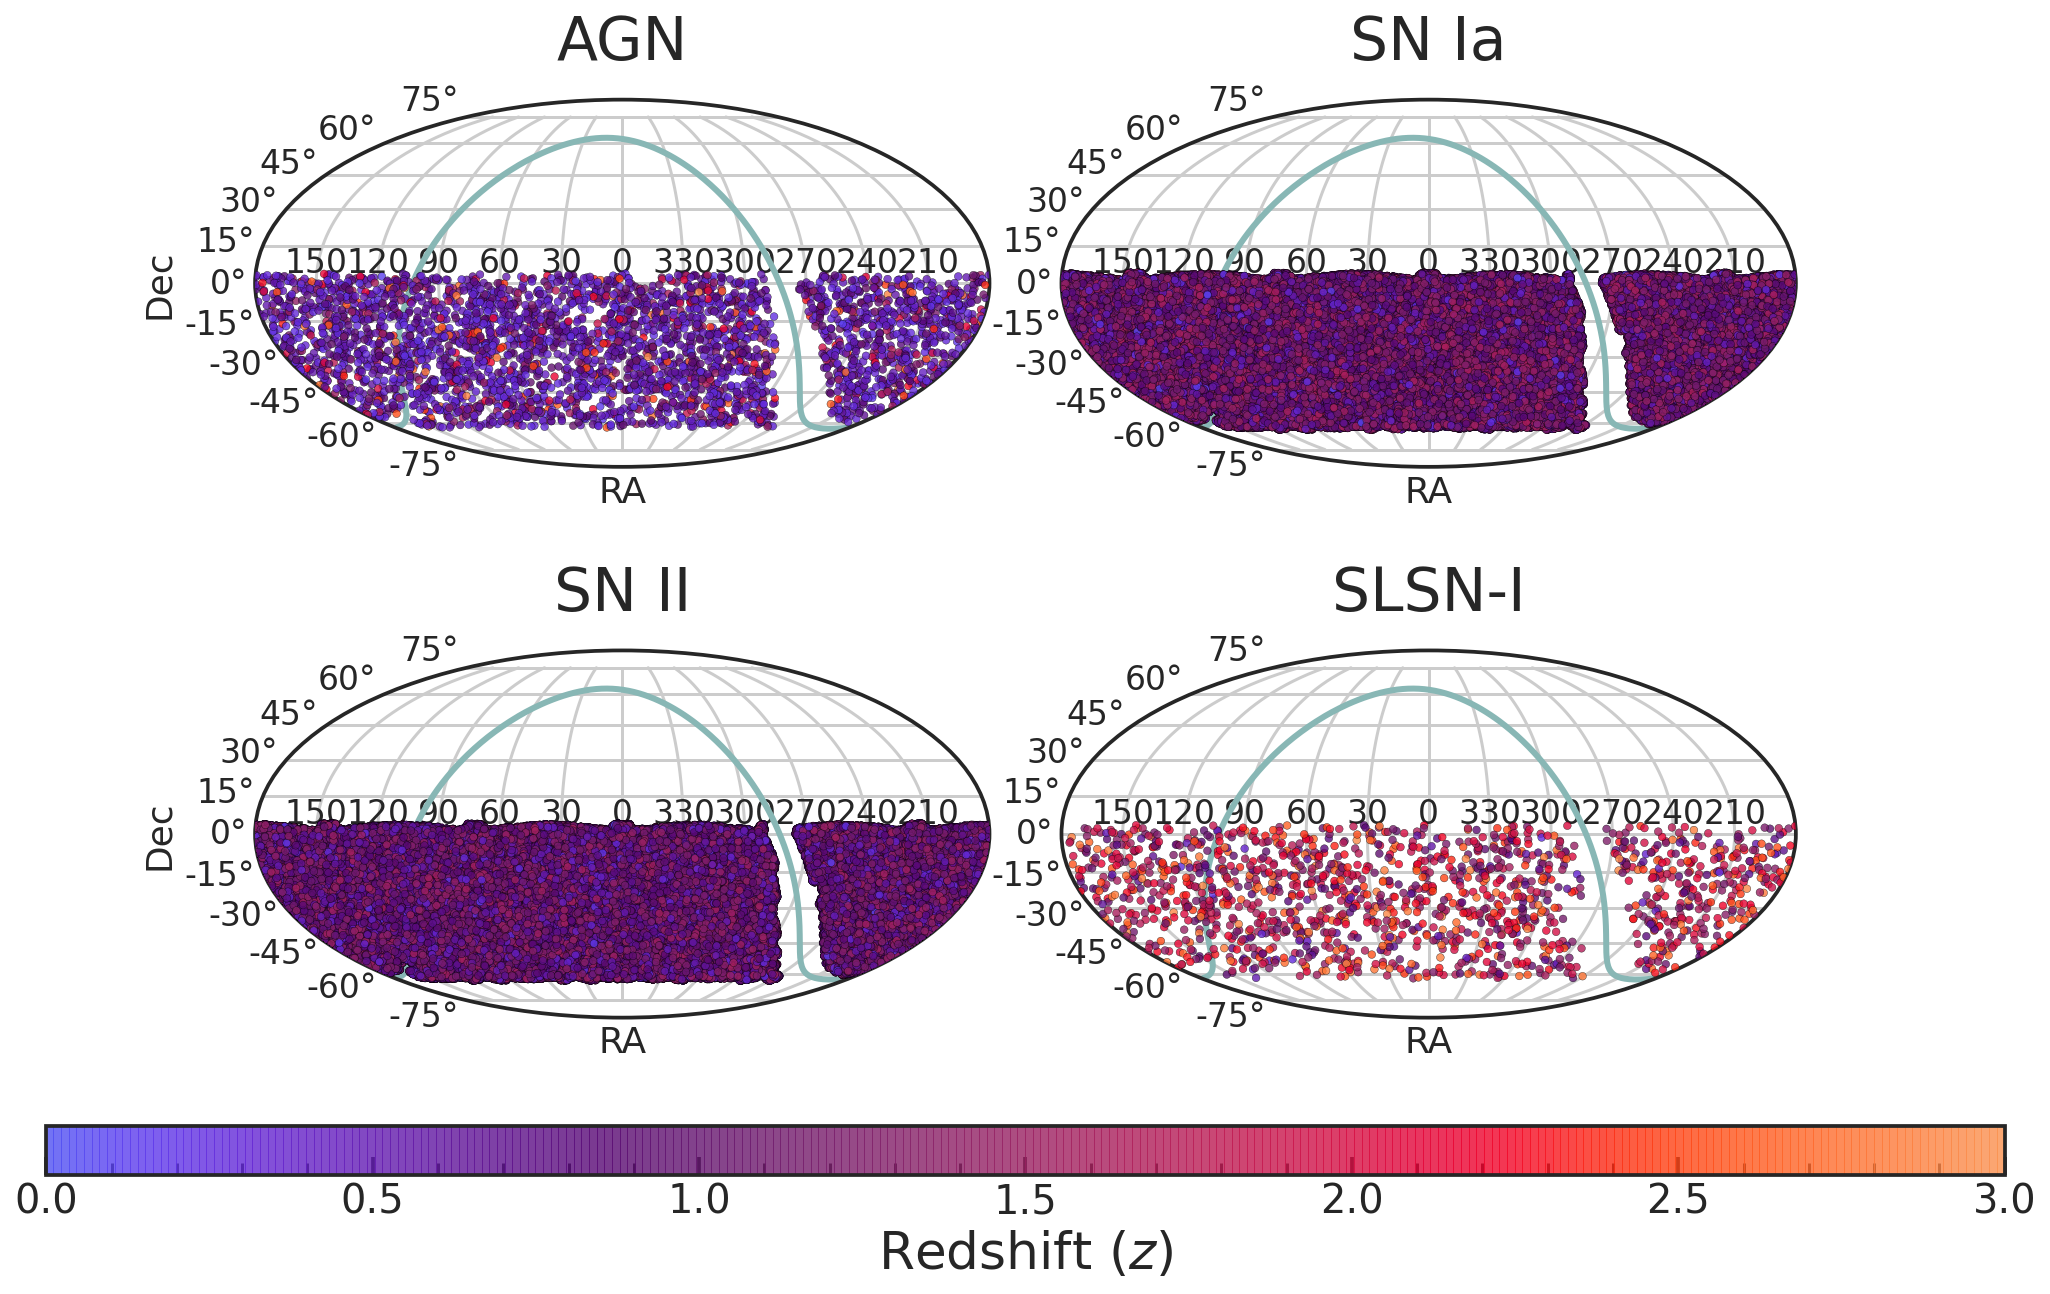

In [58]:
classes = [CC, AGN, SLSN, SNIa]  
names = ['SN II', 'AGN', 'SLSN-I', 'SN Ia']
# Import CMasher to register colormaps
import cmasher as cmr

sns.set_context("talk")
cols = sns.color_palette("muted", 12)#['#437C90', '#255957', '#EEEBD3', '#A98743','#F7C548','#9C3848','#590925','#CC2936','#2E1760','#D65780', '#9A94BC', '#A5C882']
org = 0

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('cmr.guppy_r')
new_cmap = truncate_colormap(cmap, 0.3, 1.0)

tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
tick_labels = np.remainder(tick_labels+360+org,360)
fig = plt.figure(figsize=(80, 30))
temp = []
for j in np.arange(2):
    for k in np.arange(2):
        ax = fig.add_subplot(6,j+1,k+1, projection='mollweide')
        temp.append(ax)
        ax.set_xticklabels(tick_labels)
        ax.title.set_fontsize(15)
        ax.set_xlabel("RA")
        if j==0:
            ax.set_ylabel("Dec")
        ax.grid(True)
        symb = ['o', '^','d','D','P', '*', '.', '+', 1, 8, 's', '<']
        ax.set_position(pos=[0.1+0.07*j, 0.1+0.15*k,0.1,0.1])
        ax.set_title(names[k +2*j],fontsize=30, pad=20)

        tclass = classes[k+2*j]
        RA = tclass['RA'].values
        Dec = tclass['DEC'].values
        x = np.remainder(RA+360-org,360) # shift RA values
        ind = x>180
        x[ind] -=360    # scale conversion to [-180, 180]
        x=-x    # reverse the scale: East to the left
        color = tclass['z'].values
        c = ax.scatter(np.radians(x),np.radians(Dec), c=color, zorder=300, cmap=new_cmap, s=15, lw=0.2, marker='o', label=names[j],edgecolor='k', alpha=0.8, vmin=0., vmax=3)  # convert degrees to radians

        legend_elements = []
        
        lon_array = np.arange(0,360)
        lat = 0.
        eq_array = np.zeros((360,2))
        for lon in lon_array:
            ga = ephem.Galactic(np.radians(lon), np.radians(lat))
            eq = ephem.Equatorial(ga)
            eq_array[lon] = np.degrees(eq.get())
        RA = eq_array[:,0]
        Dec = eq_array[:,1]

        x = np.remainder(RA+360-org,360) # shift RA values
        ind = x>180
        x[ind] -=360    # scale conversion to [-180, 180]
        x=-x    # reverse the scale: East to the left
        Gal_Equator = pd.DataFrame({'x':np.radians(x), 'y':np.radians(Dec)})
        Gal_Equator.sort_values(by='x', inplace=True)
        ax.plot(Gal_Equator['x'], Gal_Equator['y'], lw=3, c='#88B7B5')
x = fig.colorbar(c,fraction=0.05, pad=0.1,label=r'Redshift (z)', ax=temp, orientation="horizontal", aspect=40)
x.set_label(label=r'Redshift ($z$)', size='x-large')
x.ax.tick_params(labelsize=20) 
plt.savefig("/global/homes/a/agaglian/data_files/GP_Simulated_LSST_Redshifts_4Panel_Scale.png",dpi=300, bbox_inches='tight')

[0.5534415, 0.99114877, 1.0901732, 1.7779552]

In [61]:
SortedNames = np.unique(test_DF['Model'])[np.argsort(means)]

tempDF_arr = []
for name in SortedNames:
    tempDF = test_DF[test_DF['Model'] == name]
    tempDF_arr.append(tempDF)

NameError: name 'test_DF' is not defined

In [62]:
sortedDF = pd.concat(tempDF_arr, ignore_index=True)

ValueError: No objects to concatenate

In [63]:
test_DF = pd.concat(test)

NameError: name 'test' is not defined

In [65]:
means = []
for m in np.unique(test_DF['Model']):
    mDF = test_DF[test_DF['Model'] == m] 
    means.append(np.median(mDF['z']))

NameError: name 'test_DF' is not defined

In [72]:
z_set

[0.5534415, 0.99114877, 1.0901732, 1.7779552]

In [79]:
cmap

/global/homes/a/agaglian/.conda/envs/pzflow/lib/python3.7/site-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


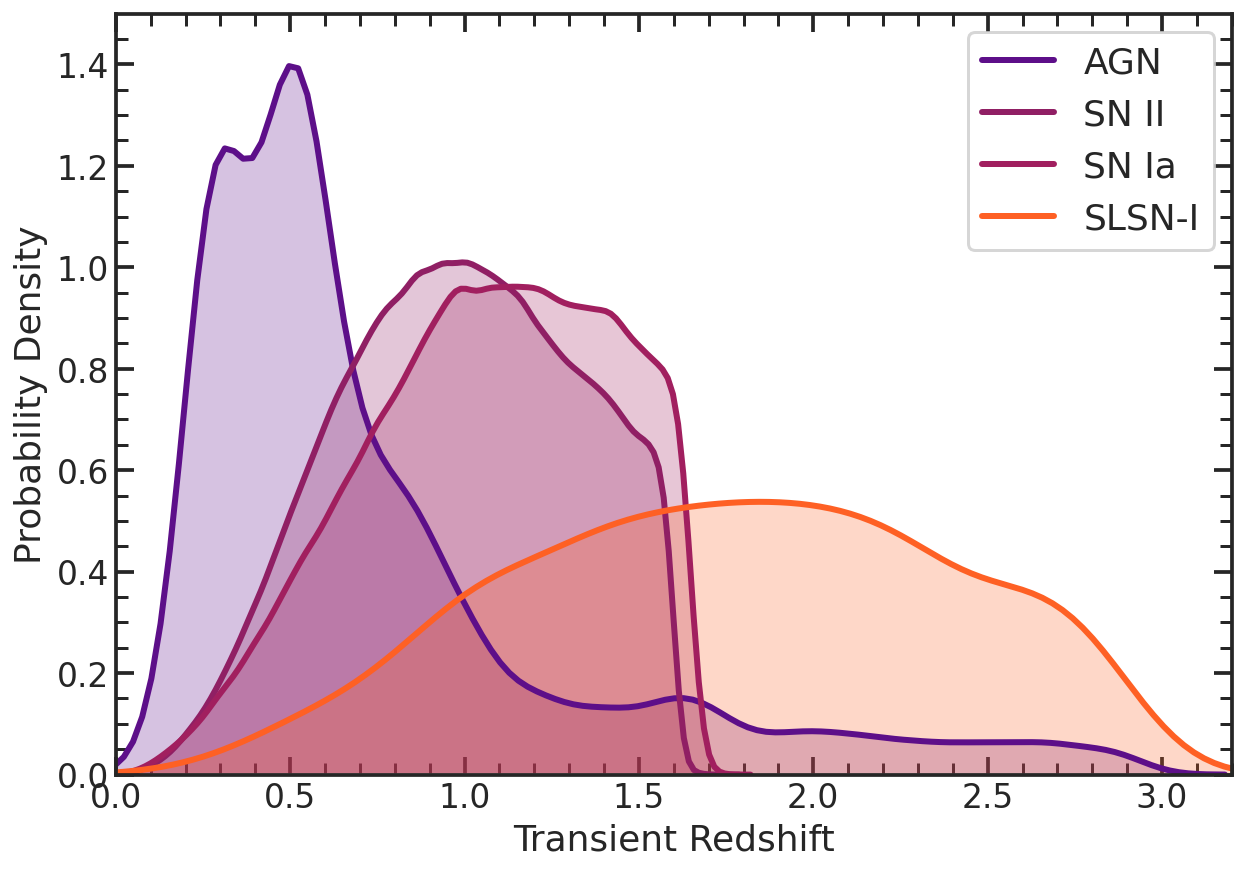

In [85]:
cmap = plt.get_cmap('cmr.guppy_r')
new_cmap = truncate_colormap(cmap, 0.3, 1.0)

##Trying to create a colormap 
norm = plt.Normalize(0.1, 2.0)
ar = np.array(z_set)

original_cmap = new_cmap
cmap = matplotlib.colors.ListedColormap(original_cmap(norm(ar)))
sm = matplotlib.cm.ScalarMappable(cmap=original_cmap, norm=norm)

classes = [AGN, CC, SNIa, SLSN]  
names = ['AGN', 'SN II', 'SN Ia', 'SLSN-I']
cols = cmap.colors

names = np.array(names)
classes = np.array(classes)
cols = np.array(cols)

#cols_sort = cols[z_set]
#names_sort = names[z_set]
#class_sort = classes[z_set]

plt.figure(figsize=(10,7))
for i in np.arange(len(classes)):
    transient = classes[i]
    sns.kdeplot(transient['z'].values, lw=3, color=cols[i], label=names[i], shade=True)
 #   meds.append(np.nanmedian(transient['z'].values))
plt.xlabel("Transient Redshift")
plt.legend(fontsize=18)
plt.xlim(xmin=-0.1)
plt.ylim(ymax=1.5)
plt.xlim(xmin=0, xmax=3.2)
plt.ylabel("Probability Density")
plt.savefig("/global/homes/a/agaglian/data_files/GP_Simulated_LSST_Redshifts_zHist.png",dpi=300, bbox_inches='tight')

In [130]:
cmap.colors

array([[0.96014327, 0.76434236, 0.67050873, 1.        ],
       [0.65251702, 0.76890184, 0.99568419, 1.        ],
       [0.81694742, 0.28042332, 0.24172473, 1.        ],
       [0.96808321, 0.72266865, 0.6145528 , 1.        ]])

In [30]:
try:
    triggerDate_AGN = np.concatenate(triggerDate_AGN)
    triggerDate_SNIa = np.concatenate(triggerDate_SNIa)
except:
    print("Already concatenated.")
    
plt.figure(figsize=(10,7))
plt.hist(triggerDate_AGN, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='g', bins=np.linspace(59581, 60643), norm=True, lw=2)
plt.hist(triggerDate_SNIa, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='k', bins=np.linspace(59581, 60643), norm=True,lw=2)
plt.yscale("log")

Already concatenated.


NameError: name 'triggerDate_AGN' is not defined

<Figure size 720x504 with 0 Axes>

In [ ]:
# sky location
ra = coordinates.Angle(all_RA, unit=u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coordinates.Angle(all_DEC, unit=u.degree)
color = all_zFINAL
sns.set_context("talk")
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="mollweide")
c = ax.scatter(ra.radian, dec.radian, c=color, s=30)
x = plt.colorbar(c, label=r'Redshift (z)', orientation="horizontal")
ax.grid()
plt.savefig("Simulated_SNeIa_LSST_smallPatch.png",dpi=300, bbox_inches='tight')

In [ ]:
headfile = table.Table.read('/Users/alexgagliano/Documents/Research/DESC/IDEAL_zALL_MODEL90_SNIa-SALT2/AG_NOSTORE_NONIaMODEL0-0001_HEAD.FITS.gz', format='fits').to_pandas()
photfile = table.Table.read('/Users/alexgagliano/Documents/Research/DESC/IDEAL_zALL_MODEL90_SNIa-SALT2/AG_NOSTORE_NONIaMODEL0-0001_PHOT.FITS.gz', format='fits').to_pandas()


headfile.NOBS

In [ ]:
headfiles = sorted(glob.glob('/Users/alexgagliano/Documents/Research/DESC/IDEAL_zALL_MODEL90_SNIa-SALT2/*HEAD.FITS.gz'))
NOBS_list = []

for i, file in enumerate(headfiles):
    headfile = table.Table.read(file, format='fits').to_pandas()
    #print(np.median(headfile.NOBS))
    NOBS_list.append(headfile.NOBS)

NOBS_pdList = [NOBS_list[x] for x in range(3)]

all_NOBS = pd.concat(NOBS_pdList, ignore_index=True)

## Read the data

The functions bellow will convert the pkl file into pandas data frames

In [ ]:
LSST_FILTERS = 'griz'


def read_data(filename):
    """Read data from pickled file to a pandas dataframe"""
    with gzip.open(filename, 'rb') as f:
        data = pickle.load(f)

    X = to_dataframe(data)
    y = pd.get_dummies(X.type == 0, prefix='SNIax', drop_first=True)
    X = X.drop(columns=['type'])

    return X, y


def to_dataframe(data):
    """Converts from a python dictionary to a pandas dataframe"""
    for idx in data:
        sn = data[idx]
        for filt in LSST_FILTERS:
            sn['mjd_%s' % filt] = np.array(sn[filt]['mjd'])
            sn['fluxcal_%s' % filt] = np.array(sn[filt]['fluxcal'])
            sn['fluxcalerr_%s' % filt] = np.array(sn[filt]['fluxcalerr'])
            
            #make mag
            sn['mag_%s' % filt] = np.array(-2.5*np.log10(np.abs(sn[filt]['fluxcal'])))+27.5
            
            sn['snr_%s' % filt] = (sn[filt]['fluxcalerr'] / np.abs(sn[filt]['fluxcal']))

        
            sn['magerr_%s' % filt] = np.array(1.086 * sn['snr_%s' % filt])
            sn['magerr_%s' % filt][sn['magerr_%s' % filt] > 0.5] = 0.5
            #  find candence
            
            sn['delta_t_%s' % filt] = [j-i for i, j in zip(sn['mjd_%s' % filt][:-1], sn['mjd_%s' % filt][1:])]
            sn['median_delta_t_%s' % filt] = np.array(np.median(sn['delta_t_%s' % filt]))
            
            sn['magobs_%s' % filt] = np.array(np.median(sn['delta_t_%s' % filt]))
            
            del sn[filt]
        sn.update(sn['header'])
        del sn['header']

    return pd.DataFrame.from_dict(data, orient='index')

# Now you can use the data doing

In [ ]:
X, y = read_data('/Users/alexgagliano/Documents/Research/DESC/SNANA/IDEAL_zALL_MODEL90_SNIa-SALT2_small.pkl.gz') #from ONLY_SNIa, NEW DR3 based eff file, big run, fix Ideal params?

The `X` contain the data itself. You can take a look at what IDs are present in X by using

In [ ]:
X.index[:100]

In [ ]:
# Get one supernovae - the first in the list
X.iloc[0]

You can choose one specific SN through its ID. For example, if you wish to access the SN 1618,

In [ ]:
X.iloc[1]

In [ ]:
[print(x) for x in X.keys()]

In [ ]:
X['SIM_HOSTLIB_GALID']

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(X['SIM_SALT2x1'], X['SIM_HOSTLIB(LOGMASS_TRUE)'], 'o', alpha=0.6, ms=4)
plt.xlabel("SALT2 x1")
plt.ylabel(r"log[Stellar Mass ($M_{\odot}$) ]")
#plt.savefig("../plots/SNANA_SNeIa_SMvsSalt2X1.png",bbox_inches='tight',dpi=200)

In [ ]:
plt.hist(X['SIM_HOSTLIB(LOG_SFR)'])
plt.xlabel(r"log10(SFR [$M_{\odot}$/yr])")
#plt.savefig("../plots/SNANA_SNeIa_SFRhist.png",bbox_inches='tight',dpi=200)

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(X['SIM_HOSTLIB(LOGMASS_TRUE)'])
plt.xlabel(r"log10(Stellar Mass [$M_{\odot}$])")
#plt.savefig("../plots/SNANA_SNeIa_SM.png",bbox_inches='tight',dpi=200)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(X['SIM_HOSTLIB(LOGMASS_TRUE)'], X['SIM_SALT2x1'], 'o', ms=3)
#plt.xlabel(r"SALT2 x1")
#plt.savefig("../plots/SNANA_SNeIa_X1.png",bbox_inches='tight',dpi=200)

In [ ]:
#plt.hist(X['SIM_HOSTLIB(LOGSFR)'])

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

logmass = X["SIM_HOSTLIB(LOGMASS_TRUE)"].values
logsfr = X["SIM_HOSTLIB(LOG_SFR)"].values
g = sns.JointGrid(x=logmass, y=logsfr, xlim=(7, 11), ylim=(-6, 2), height=7)
g = g.plot_joint(plt.scatter, color="m", edgecolor="white", s=15, alpha=0.7)
_ = g.ax_marg_x.hist(logmass,
                      bins=np.linspace(7, 11, 20), density=True, fill=False)
_ = g.ax_marg_y.hist(logsfr, 
                      orientation="horizontal",
                      bins=np.linspace(-6, 2, 20), density=True, Fill=False)
plt.ylabel("log[SFR($M_{\odot}$/yr) ]")
plt.xlabel(r"log[Stellar Mass ($M_{\odot}$) ]")
plt.plot(np.linspace(7, 11), -11.5*np.linspace(7,11), lw=5)
#plt.savefig("../plots/SNANA_SNeIa_SFRvsSM.png",bbox_inches='tight',dpi=200)

In [ ]:
from collections import Counter
Counter(X['SIM_REDSHIFT_FLAG'])

In [ ]:
sns.set_context("talk")
plt.figure(figsize=(10,7))
sns.kdeplot(X['SIM_SALT2x1'], X['SIM_HOSTLIB(LOGMASS_TRUE)'])
plt.plot(X['SIM_SALT2x1'], X['SIM_HOSTLIB(LOGMASS_TRUE)'], 'o')
plt.xlabel("Salt2 X1")
plt.ylabel("Log10(Stellar Mass)")
#plt.savefig("./HOST_MAG_LSST_Ia.png",dpi=200, bbox_inches='tight')

In [ ]:
sns.set_context("talk")
plt.figure(figsize=(10,7))
sns.scatterplot(x=X['SIM_HOSTLIB(MAG_TRUE_r_SDSS_z0)'], y=X['SIM_HOSTLIB(MAG_TRUE_g_SDSS_z0)'], hue=X['z'])
plt.xlabel("Host $M_{r,SDSS}$")
plt.ylabel("Host $M_{g,SDSS}$")
#plt.savefig("./HOST_MAG_LSST_Ia.png",dpi=200, bbox_inches='tight')

In [ ]:
sns.set_context("talk")
plt.figure(figsize=(10,7))
sns.scatterplot(x=X['SIM_HOSTLIB(LOGMASS_TRUE)'], y=X['SIM_SALT2c'],hue=X['z'])
#plt.xlabel("Redshift")
plt.ylabel("SALT2 c")
#plt.yscale("log")
plt.xlabel(r"log Mass [$M_{\odot}$]")
#plt.savefig("./HOST_Size_LSST_Ia.png",dpi=200, bbox_inches='tight')

In [ ]:
sns.set_context("talk")
plt.figure(figsize=(10,7))
sns.scatterplot(x=X['z'], y=X['SIM_PEAKMAG_r'],hue=X['SIM_HOSTLIB(MAG_TRUE_g_SDSS_z0)'])
plt.xlabel("Redshift")
plt.ylabel(r"Peak SN Magnitude, $r$")
plt.gca().invert_yaxis()
plt.savefig("./SNIa_PeakMag_LSST_Ia.png",dpi=200, bbox_inches='tight')

In [ ]:
sns.set_context("talk")
plt.figure(figsize=(10,7))
sns.scatterplot(x=X['z'], y=X['r'] - X['i'],hue=X['SIM_HOSTLIB(MAG_TRUE_g_SDSS_z0)'])
plt.xlabel("Redshift")
plt.ylabel(r"Peak SN Magnitude, $r$")
plt.gca().invert_yaxis()
#plt.savefig("./SNIa_PeakMag_LSST_Ia.png",dpi=200, bbox_inches='tight')

In [ ]:
#sns.set_context("talk")
#sns.set_palette("colorblind")
#plt.figure(figsize=(10,7))
#plt.hist(X['z'], label="Simulated LSST-'Observed' SNIa Sample")
#plt.hist(GHOST_Ia['NED_redshift'].dropna(), label='GHOST SNIa Sample')
#plt.xlabel("Redshift")
#plt.ylabel("Probability Density")
#plt.legend()
#plt.savefig("./LSST_Ia.png",dpi=200, bbox_inches='tight')


plt.figure(figsize=[10,6])
sns.set_context("poster")
sns.set_palette("colorblind")
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=[10,10], sharex=True)
ax[0].hist(GHOST_Ia['NED_redshift'].dropna(),bins=40, color=sns.color_palette("colorblind")[0], label='GHOST, {:d} total'.format(len(GHOST_Ia)))
#ax[1].hist(X['z'],bins=40, color=sns.color_palette("colorblind")[1], label='CosmoDC2, {:d} total'.format(len(X)))
plt.xlabel("redshift")
plt.legend()
ax[0].set_ylabel("Number of galaxies")
#ax[1].set_ylabel("Number of galaxies")
#ax[1].ticklabel_format(axis='y', style='sci')
ax[0].legend()
plt.savefig("GHOST_histogram.png")

In [ ]:
sns.set_context("talk")
plt.figure(figsize=(10,7))
sns.scatterplot(x=X['SIM_HOSTLIB(STELLAR_MASS)'],y=X['SIM_HOSTLIB(STAR_FORMATION_RATE)'], hue=X['z'])
plt.yscale("log")
plt.xscale("log") 
plt.xlabel(r"Host Stellar Mass [$M_{\odot}$]")
plt.ylabel(r"Host Star Formation Rate [$M_{\odot/Gyr}$]");
plt.savefig("./HOST_Mass_LSST_Ia.png",dpi=200, bbox_inches='tight')

In [ ]:
sns.set_context("talk")
plt.figure(figsize=(10,7))
sns.scatterplot(x=X['SIM_HOSTLIB(STELLAR_MASS)'],y=X['SIM_HOSTLIB(STAR_FORMATION_RATE)'], hue=X['z'])
plt.yscale("log")
plt.xscale("log") 
plt.xlabel(r"Host Stellar Mass [$M_{\odot}$]")
plt.ylabel(r"Host Star Formation Rate [$M_{\odot/Gyr}$]");
plt.savefig("./HOST_Mass_LSST_Ia.png",dpi=200, bbox_inches='tight')

In [ ]:
sns.set_context("talk")
plt.figure(figsize=(10,7))
sns.scatterplot(x=X['SIM_HOSTLIB(MAG_TRUE_g_SDSS_z0)'],y=X['SIM_HOSTLIB(STAR_FORMATION_RATE)'], hue=X['z'])
plt.yscale("log")
#plt.xscale("log")
plt.ylabel(r"Host Star Formation Rate")
plt.xlabel(r"Host $M_g$");
plt.savefig("./HOST_SFR_LSST_Ia.png",dpi=200, bbox_inches='tight')

In [ ]:
sns.set_context("talk")
plt.figure(figsize=(10,7))
sns.scatterplot(x=X['SIM_HOSTLIB(MAG_TRUE_r_SDSS_z0)'],y=X['SIM_PEAKMAG_r'], hue=X['z'])
plt.xlabel("Host $M_{r,SDSS}$")
plt.ylabel(r"Peak SN Magnitude, $r$");
plt.savefig("./HOST_Brightness_LSST_Ia.png",dpi=200, bbox_inches='tight')

In [ ]:
#a color plot
sns.set_context("talk")
plt.figure(figsize=(10,7))
sns.scatterplot(x=X['SIM_HOSTLIB(MAG_TRUE_g_SDSS_z0)'] - X['SIM_HOSTLIB(MAG_TRUE_r_SDSS_z0)'],y=X['SIM_HOSTLIB(MAG_TRUE_r_SDSS_z0)'] - X['SIM_HOSTLIB(MAG_TRUE_i_SDSS_z0)'], hue=X['z'])
plt.xlabel("$g-r$")
plt.ylabel(r"$r-i$");
plt.xlim((0, 1.0))
plt.ylim((-0.1, 0.5))
#plt.savefig("./HOST_Brightness_LSST_Ia.png",dpi=200, bbox_inches='tight')

In [ ]:
#compare to GHOST results:
GHOST = pd.read_csv("../tables/GHOST_restFrame_condenseLabels_cleanColor.tar.gz")
np.unique(GHOST['TransientClass'])

In [ ]:
GHOST_Ia = GHOST[GHOST['TransientClass'].isin(['SN Ia', 'SNIa', 'Ia'])]

In [ ]:
GHOST_Ia_lowz = GHOST_Ia[GHOST_Ia['TransientRedshift'] < 0.4]
GHOST_Ia_highz = GHOST_Ia[GHOST_Ia['TransientRedshift'] > 0.4]

In [ ]:
X_lowz = X[X['z'] < 0.4]

In [ ]:
sns.set_context("talk")
plt.figure(figsize=(10,7))
sns.scatterplot(GHOST_Ia['g-r_SDSS_rest'], GHOST_Ia['i-z_SDSS_rest'], hue=GHOST_Ia['TransientRedshift'], s=50)
sns.kdeplot(x=X_lowz['SIM_HOSTLIB(MAG_TRUE_g_SDSS_z0)'] - X_lowz['SIM_HOSTLIB(MAG_TRUE_r_SDSS_z0)'],y=X_lowz['SIM_HOSTLIB(MAG_TRUE_i_SDSS_z0)'] - X_lowz['SIM_HOSTLIB(MAG_TRUE_z_SDSS_z0)'], label='cosmoDC2 Galaxies')
plt.xlabel("$g-r$")
plt.ylabel(r"$i-z$");
plt.legend()
plt.xlim((0.1, 1.2))
plt.ylim((-0.2, 0.8))
plt.title("'Observed' SNIa Host Galaxies")
plt.savefig("./Color_iz_GHOST_v_DC2_LSST_Ia_Wide.png",dpi=200, bbox_inches='tight')

In [ ]:
GHOST_Ia.columns.values

In [ ]:
GHOST_Ia['i_ellip']

In [ ]:
mean_ellip = (GHOST_Ia['g_ellip'] + GHOST_Ia['r_ellip'] + GHOST_Ia['i_ellip'] + GHOST_Ia['z_ellip'])/4.

In [ ]:
sns.set_palette("colorblind")
sns.set_context("talk")
plt.figure(figsize=(10,7))
plt.hist(X['SIM_HOSTLIB(TOTAL_ELLIPTICITY)'],label='DC2', density=True)
plt.hist(mean_ellip, label='GHOST',alpha=0.8, density=True)
plt.xlabel("Ellipticity")
plt.title("'Observed' SNIa Host Galaxies")
plt.legend()
plt.xlim((-0.01, 0.3))
plt.savefig("./ObservedIaHosts_EllipticityHistogram.png",dpi=200, bbox_inches='tight')

In [ ]:
plt.hist(np.log10(X["SIM_HOSTLIB(STAR_FORMATION_RATE)"]))

In [ ]:
median_delta_t_g = X.median_delta_t_g.reset_index().drop(columns=['index'])
median_delta_t_r = X.median_delta_t_r.reset_index().drop(columns=['index'])
redshift_host = X.SIM_REDSHIFT_HOST.reset_index().drop(columns=['index'])

#all_NOBS_df = pd.DataFrame(all_NOBS)

In [ ]:
# make df of NOBS and median delta_t for each filter

NOBS_and_median_Dt = pd.concat([median_delta_t_g, median_delta_t_r, redshift_host], axis=1, sort=False)
NOBS_and_median_Dt.head()

In [ ]:
NOBS_and_median_Dt=NOBS_and_median_Dt.astype(float)

In [ ]:
#sns.kdeplot(NOBS_and_median_Dt.median_delta_t_r, NOBS_and_median_Dt.NOBS, color='r', 
#            shade=True, cbar=True, alpha=0.9)
sns.kdeplot(NOBS_and_median_Dt.median_delta_t_g, NOBS_and_median_Dt.median_delta_t_r, color='g', 
            shade=True, cbar=True, alpha=0.9)

In [ ]:
sns.relplot(
    data=NOBS_and_median_Dt,
    x="median_delta_t_g", y="median_delta_t_r", hue='SIM_REDSHIFT_HOST'
)

In [ ]:
# Make hist of cadences vs NOBS
sns.set_context("talk")
plt.figure(figsize=(10,7))
bins = np.linspace(0, 8, 9)

plt.scatter(NOBS_and_median_Dt['median_delta_t_g'], NOBS_and_median_Dt['SIM_REDSHIFT_HOST'], label=r'g', 
            color='g', alpha=0.3)
plt.scatter(NOBS_and_median_Dt['median_delta_t_r'], NOBS_and_median_Dt['SIM_REDSHIFT_HOST'], label=r'r',
            color='r', alpha=0.3)
#plt.xlim(15,24)
#plt.ylim(0, 50)
plt.legend(loc='upper right')
plt.xlabel(r'median $\Delta$mjd of obs (days)')
plt.ylabel('Host Redshift');

In [ ]:
# Make hist of cadences

bins = np.linspace(0, 8, 9)

plt.hist(X.median_delta_t_g, bins=bins, edgecolor="k", label=r'g', color='g', alpha=0.3)
plt.hist(X.median_delta_t_r, bins=bins, edgecolor="k", label=r'r', color='r', alpha=0.3)
#plt.xlim(15,24)
#plt.ylim(0, 50)
plt.xticks([0,1,2,3,4,5,6,7,8])
plt.legend(loc='upper right')
plt.xlabel(r'median $\Delta$mjd of obs (days)')
plt.ylabel('# LCs');

In [ ]:
plt.hist(X.pkmag_g, edgecolor="k", label='peakmag g', color='g', alpha=0.3)
plt.hist(X.pkmag_r, edgecolor="k", label='peakmag r', color='r', alpha=0.3)
plt.xlim(15,24)
#plt.ylim(0, 50)
plt.legend(loc='upper left')
plt.xlabel('peakmag')
plt.ylabel('Counts');

In [ ]:
fig = plt.figure(figsize=(35, 65))

for i, k in enumerate(X.keys()[12:]):
    
    ax = fig.add_subplot(10, 5, i+1) #50 

    plt.hist(X['{}'.format(k)], histtype='step', 
             linestyle='dashed', linewidth=2, label='{}'.format(k))

    #ax.set_title(r'{}'.format(k), fontsize=14)
    ax.set_ylabel('Counts', fontsize=14)
    ax.set_xlabel('{}'.format(k), fontsize=14)
    #ax.set_yscale('log')
    ax.tick_params(labelsize=14)

## Plotting the Light curves

You can use the utility bellow to plot one (or a few) light curves

In [ ]:
# Number of LCs

len(X.index)

The functionality below will plot light curves in sequence, order by ID

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
#plt.style.use('seaborn')
%matplotlib inline


nrows,ncols = 1,2
figsize=(8, 4)

def plot_lightcurves(idx, X, f, model_name, compare_file):    
    
    flux = []
    for f in LSST_FILTERS:
        if len(X.iloc[idx]['fluxcal_' + f]) > 0:
            flux.append(max(X.iloc[idx]['fluxcal_' + f]))
    
    if compare_file is not None:
        real_SNIa = pd.read_csv(compare_file)
        peakmag = np.min(real_SNIa['Mag'])
        peakmjd = real_SNIa.loc[real_SNIa['Mag']==peakmag]['MJD']
        real_SNIa['FromPeak'] = real_SNIa['MJD'] - peakmjd.values
        
            
    for i, (axi, f) in enumerate(zip(ax.flat, LSST_FILTERS)):
        axi.errorbar(X.iloc[idx]['mjd_%s' % f] - X.iloc[idx]['pkmjd'], 
                        X.iloc[idx]['mag_%s' % f], X.iloc[idx]['magerr_%s' % f], 
                        fmt='+', label='ID = {}'.format(X.iloc[idx]['snid']))  

        rowid = i // ncols
        colid = i % ncols
        axi.set_xlim(-100,100)
        axi.set_ylim(np.max(X.iloc[idx]['mag_%s' % f]), np.min(X.iloc[idx]['mag_%s' % f]))
        axi.set_xlabel('MJD')
        axi.set_ylabel('Magnitude')
        axi.set_title('%s-band' % f)

        ax[0,0].legend(loc='upper right', bbox_to_anchor=(1, -0.15), ncol=2, fancybox=True, shadow=True, fontsize=12)
        ax[0,1].legend(loc='upper right', bbox_to_anchor=(1.1, -0.15), ncol=2, fancybox=True, shadow=True, fontsize=12)
        plt.suptitle('{}; {} light curves'.format(model_name, nplots))
        

    else: pass 
    

In [ ]:
real_SNIa = pd.read_csv('ZTF18acmzpbf.csv')
peakmag = np.min(real_SNIa['Mag'])
peakmjd = real_SNIa.loc[real_SNIa['Mag']==peakmag]['MJD']
real_SNIa['FromPeak'] = real_SNIa['MJD'] - peakmjd.values
real_SNIa_g = real_SNIa[real_SNIa['Filter']=='g']
real_SNIa_r = real_SNIa[real_SNIa['Filter']=='R']

In [ ]:
# set the number of light curves to plot
nplots = 10

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8, 4), squeeze=False)

ax[0,0].errorbar(real_SNIa_g['FromPeak'], real_SNIa_g['Mag'], real_SNIa_g['MagErr'],
                            fmt='+', label='ZTF18acmzpbf')
ax[0,1].errorbar(real_SNIa_r['FromPeak'], real_SNIa_r['Mag'], real_SNIa_r['MagErr'],
                            fmt='+', label='ZTF18acmzpbf')

for i in range(nplots):
    plot_lightcurves(i, X, 'gr', 'SNIa-SALT2', 'ZTF18acmzpbf.csv')
    

If you wish to plot one specific light curve, e.g. again SN 175,

In [ ]:
def plot_lightcurves_id(idx, X, f, compare_file):    
    
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8, 4), squeeze=False)
    plt.gca().invert_yaxis()
    
    flux = []
    for f in LSST_FILTERS:
        if len(X.loc[idx]['fluxcal_' + f]) > 0:
            flux.append(max(X.loc[idx]['fluxcal_' + f]))
            
    if compare_file is not None:
        real_SNIa = pd.read_csv(compare_file)
        peakmag = np.min(real_SNIa['Mag'])
        peakmjd = real_SNIa.loc[real_SNIa['Mag']==peakmag]['MJD']
        real_SNIa['FromPeak'] = real_SNIa['MJD'] - peakmjd.values

        # Turn mag to calibrated flux (fluxcal=10**(-0.4·mag+11))
        real_SNIa_g = real_SNIa[real_SNIa['Filter']=='g']
        real_SNIa_r = real_SNIa[real_SNIa['Filter']=='R']
        
        ax[0,0].errorbar(real_SNIa_g['FromPeak'], real_SNIa_g['Mag'], real_SNIa_g['MagErr'],
                            fmt='+', label='{}'.format(compare_file[:-4]))
        ax[0,1].errorbar(real_SNIa_r['FromPeak'], real_SNIa_r['Mag'], real_SNIa_r['MagErr'],
                            fmt='+', label='{}'.format(compare_file[:-4]))

        
        
        for i, (axi, f) in enumerate(zip(ax.flat, LSST_FILTERS)):
            
            
            axi.errorbar(X.loc[idx]['mjd_%s' % f] - X.loc[idx]['pkmjd'], 
                            X.loc[idx]['mag_%s' % f], X.loc[idx]['magerr_%s' % f], 
                            fmt='+', label='ID = {}'.format(X.loc[idx]['snid'])) 
            

            rowid = i // ncols
            colid = i % ncols
            axi.set_xlim(-100,100)
            #axi.set_ylim(np.max(X.loc[idx]['mag_%s' % f]), np.min(X.loc[idx]['mag_%s' % f]))
            axi.set_ylim(23,16)
            axi.set_xlabel('MJD')
            axi.set_ylabel('Magnitude')
            axi.set_title('%s-band' % f)
            ax[0,0].legend(loc='upper right', bbox_to_anchor=(0.5, -0.15), ncol=2, fancybox=True, shadow=True, fontsize=12)
            ax[0,1].legend(loc='upper right', bbox_to_anchor=(0.6, -0.15), ncol=2, fancybox=True, shadow=True, fontsize=12)

    if compare_file is None:

        for i, (axi, f) in enumerate(zip(ax.flat, LSST_FILTERS)):
            axi.errorbar(X.loc[idx]['mjd_%s' % f] - X.loc[idx]['pkmjd'], 
                            X.loc[idx]['mag_%s' % f], X.loc[idx]['magerr_%s' % f], 
                            fmt='+', label='ID = {}'.format(X.loc[idx]['snid'])) 

            rowid = i // ncols
            colid = i % ncols
            axi.set_xlim(-100,100)
            #axi.set_ylim(25,16)
            axi.set_xlabel('MJD')
            axi.set_ylabel('Magnitude')
            axi.set_title('%s-band' % f)
            ax[0,0].legend(loc='upper right', bbox_to_anchor=(0.9, -0.15), ncol=2, fancybox=True, shadow=True, fontsize=12)
            ax[0,1].legend(loc='upper right', bbox_to_anchor=(1.0, -0.15), ncol=2, fancybox=True, shadow=True, fontsize=12)

In [ ]:
plot_lightcurves_id(2760, X, 'gr', 'ZTF18acmzpbf.csv') # z= 0.036 for ZTF18, z = 0.039309 for ID=2760
plot_lightcurves_id(2803, X, 'gr', 'ZTF18acmzpbf.csv') # z= 0.03175 for ID=2803

In [ ]:
plot_lightcurves_id(4403, X, 'gr', 'ZTF19aadnmgf.csv') # z= 0.08 for ZTF19, z = 0.039309 for ID=2760

# Plot LCs, parsed by $z$ to see sampling

In [ ]:
bins = np.linspace(0, 0.5, 20)
plt.hist(X.z, bins=bins, edgecolor="k")
plt.xlabel(r'$z$')
plt.ylabel('Counts');

In [ ]:
lowz = 0.08
highz = 0.1
Xlowz = X[X.z < lowz]
Xhighz = X[X.z > highz]

In [ ]:
# set the number of light curves to plot
nplots = 5

plt.hist(Xlowz.pkmag_r, range=(15,25), histtype='step', label='peakmag_r')
plt.hist(Xlowz.pkmag_g, range=(15,25), histtype='step', label='peakmag_g')
plt.legend()

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8, 4), squeeze=False)

for i in range(nplots):
    plot_lightcurves(i, Xlowz, 'gr', 'SNIa-SALT2 Low Z (z < {})'.format(lowz), None)

In [ ]:
# set the number of light curves to plot
nplots = 5

plt.hist(Xhighz.pkmag_r, range=(15,30), histtype='step', label='peakmag_r')
plt.hist(Xhighz.pkmag_g, range=(15,30), histtype='step', label='peakmag_g')
plt.legend()

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8, 4), squeeze=False)

for i in range(nplots):
    plot_lightcurves(i, Xhighz, 'gr', 'SNIa-SALT2 High Z (z > {})'.format(highz), None)

In [ ]:
# Look at real SNIa LCs from ZTF for comparison

real_SNIa = pd.read_csv('ZTF18acmzpbf.csv')
real_SNIa.head()

In [ ]:
peakmag = np.min(real_SNIa['Mag'])
peakmjd = real_SNIa.loc[real_SNIa['Mag']==peakmag]['MJD']

In [ ]:
real_SNIa['FromPeak'] = real_SNIa['MJD'] - peakmjd.values

# Turn mag to calibrated flux (fluxcal=10**(-0.4·mag+11))

real_SNIa['fluxcal'] = 10**(-0.4*real_SNIa['Mag']+11) 
real_SNIa['fluxcalnorm'] = real_SNIa['fluxcal'] / np.max(real_SNIa['fluxcal']) # idk if this is right
real_SNIa_g = real_SNIa[real_SNIa['Filter']=='g']
real_SNIa_r = real_SNIa[real_SNIa['Filter']=='R']

In [ ]:
plt.scatter(real_SNIa_r['FromPeak'], real_SNIa_r['fluxcalnorm'])
plt.scatter(real_SNIa_g['FromPeak'], real_SNIa_g['fluxcalnorm'])

# IGNORE BELOW

## Example of population tests

Bellow are just a few examples I could quickly think of. 
Feel free to add as much as you want

### Flux values

Check the minimum and maximum values for all filters

In [ ]:
max_flux = {}
min_flux = {}

# for each filter
for f in LSST_FILTERS:
    max_flux[f] = []
    min_flux[f] = []
    
    # get the flux values
    for indx in range(len(X)):
        if len(X.iloc[indx]['fluxcal_' + f]) > 0:
            max_flux[f].append(max(X.iloc[indx]['fluxcal_' + f]))
            min_flux[f].append(min(X.iloc[indx]['fluxcal_' + f]))                   

After this information is gathered we can check the the distribution of its values

In [ ]:
fig, axes = plt.subplots(2, 3, sharex=False, sharey=True, figsize=(12, 8))     
for id_f, f in enumerate(LSST_FILTERS):        
    ax = axes[id_f // 3, id_f % 3]
    ax.hist(max_flux[f])
    ax.set_xlabel('Max flux')
    ax.set_ylabel('Number of objects')
    ax.set_title('%s-band' % f)

In [ ]:
for f in LSST_FILTERS:
    print(min(max_flux[f]), max(max_flux[f]))

Same thing for minimum values

In [ ]:
fig, axes = plt.subplots(2, 3, sharex=False, sharey=True, figsize=(12, 8))     
for id_f, f in enumerate(LSST_FILTERS):        
    ax = axes[id_f // 3, id_f % 3]
    ax.hist(min_flux[f])
    ax.set_xlim(min(min_flux[f]), max(min_flux[f]))
    ax.set_xlabel('Min flux')
    ax.set_ylabel('Number of objects')
    ax.set_title('%s-band' % f)

In [ ]:
for f in LSST_FILTERS:
    print(min(min_flux[f]), max(min_flux[f]))

# We don't have ideal ZTF SNe LCs... SO IGNORE NEXT

## Compare with ideal simulations

Using the same procedure we used before, generate the pkl files for the ideal simulations

```
>> python serialize_lsst_sn_sims.py ../../data/IDEAL_2018-02-11/IDEAL_MODEL01/ --timed
```

this will generate a `IDEAL_MODEL01_train.pkl` in your local directory.


You can read the data as before:

In [ ]:
X1, y1 = read_data('IDEAL_MODEL01_train.pkl')

In [ ]:
y1[:10]

And plot some ID

In [ ]:
plot_lightcurves_id(1, X1)

Suppose we wish to compare our pet project SN 1618 from the non-ideal simuations. We can check its redshift:

In [ ]:
z1618 = X.z[1618]
z1618

now which ideal simulations are close to it in redshift

In [ ]:
neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - z1618) <= 0.001] 
neighbors[:10]
X1.z[y1.index[741]]

Plot them all

In [ ]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))
for i in neighbors[:1]:
    plot_lightcurves(i, X1)

Superimpose the non-ideal light curve.

In [ ]:
snid = 1618

def plot_lightcurves_ideal_compare(snid, X, neighbors, X1):  
    
    fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8)) 
    
    for idx in neighbors:
        flux = []
        for f in LSST_FILTERS:
            if len(X1.iloc[idx]['fluxcal_' + f]) > 0:
                flux.append(max(X1.iloc[idx]['fluxcal_' + f]))
   
        for id_f, f in enumerate(LSST_FILTERS):
            ax = axes[id_f // 3, id_f % 3]
            ax.errorbar(X1.iloc[idx]['mjd_%s' % f] - X1.iloc[idx]['pkmjd'], 
                        X1.iloc[idx]['fluxcal_%s' % f]/max(flux), 
                        X1.iloc[idx]['fluxcalerr_%s' % f]/max(flux), 
                        fmt='o')
            ax.set_xlabel('MJD')
            ax.set_ylabel('Calibrated flux')
            ax.set_title('%s-band' % f)
    
    flux2 = []
    for f in LSST_FILTERS:
        if len(X.loc[snid]['fluxcal_' + f]) > 0:
            flux2.append(max(X.loc[snid]['fluxcal_' + f]))
    
    for id_f, f in enumerate(LSST_FILTERS):
        ax = axes[id_f // 3, id_f % 3]
        ax.errorbar(X.loc[snid]['mjd_%s' % f] - X.loc[snid]['pkmjd'], 
                    X.loc[snid]['fluxcal_%s' % f]/max(flux), 
                    X.loc[snid]['fluxcalerr_%s' % f]/max(flux), 
                    fmt='o', color='black')
        ax.set_xlabel('MJD')
        ax.set_ylabel('Calibrated flux')
        ax.set_title('%s-band' % f)

In the plot bellow, the black points corresponto the realistic light curve and the other colors to perfect simulations (high cadence and no noise)

In [ ]:
plot_lightcurves_ideal_compare(snid, X, neighbors[:1], X1)

In [ ]:
print(X.z[1])
neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - X.z[1]) <= 0.001] 
print(neighbors[:10])
print(X1.z[y1.index[821]])

In [ ]:
plot_lightcurves_ideal_compare(1, X, [821], X1)

In [ ]:
X.z[11]

In [ ]:
index = 11
print(X.z[index])
neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - X.z[index]) <= 0.001] 
print(neighbors[:10])
print(X1.z[y1.index[neighbors[0]]])
plot_lightcurves_ideal_compare(index, X, neighbors[:1], X1)

In [ ]:
y[:10]

In [ ]:
index = 37
print(X.z[index])
neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - X.z[index]) <= 0.001] 
print(neighbors[:10])
print(X1.z[y1.index[neighbors[0]]])
plot_lightcurves_ideal_compare(index, X, neighbors[:1], X1)

In [ ]:
index = 50
print(X.z[index])
neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - X.z[index]) <= 0.001] 
print(neighbors[:10])
print(X1.z[y1.index[neighbors[0]]])
plot_lightcurves_ideal_compare(index, X, neighbors[:1], X1)

In [ ]:
index = 121
print(X.z[index])
neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - X.z[index]) <= 0.001] 
print(neighbors[:10])
print(X1.z[y1.index[neighbors[0]]])
plot_lightcurves_ideal_compare(index, X, neighbors[:1], X1)

In [ ]:
index = 133
print(X.z[index])
neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - X.z[index]) <= 0.001] 
print(neighbors[:10])
print(X1.z[y1.index[neighbors[0]]])
plot_lightcurves_ideal_compare(index, X, neighbors[:1], X1)

In [ ]:
index = 137
print(X.z[index])
neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - X.z[index]) <= 0.001] 
print(neighbors[:10])
print(X1.z[y1.index[neighbors[0]]])
plot_lightcurves_ideal_compare(index, X, neighbors[:1], X1)

In [ ]:
y[:10]

In [ ]:
index = 154
print(X.z[index])
neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - X.z[index]) <= 0.001] 
print(neighbors[:10])
print(X1.z[y1.index[neighbors[0]]])
plot_lightcurves_ideal_compare(index, X, neighbors[:1], X1)

In [ ]:
index = 156
print(X.z[index])
neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - X.z[index]) <= 0.001] 
print(neighbors[:10])
print(X1.z[y1.index[neighbors[0]]])
plot_lightcurves_ideal_compare(index, X, neighbors[:1], X1)

In [ ]:
index = 164
print(X.z[index])
neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - X.z[index]) <= 0.001] 
print(neighbors[:10])
print(X1.z[y1.index[neighbors[0]]])
plot_lightcurves_ideal_compare(index, X, neighbors[:1], X1)

In [ ]:
y[8:18]

In [ ]:
index = 186
print(X.z[index])
neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - X.z[index]) <= 0.001] 
print(neighbors[:10])
print(X1.z[y1.index[neighbors[0]]])
plot_lightcurves_ideal_compare(index, X, neighbors[:1], X1)

In [ ]:
index = 187
print(X.z[index])
neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - X.z[index]) <= 0.001] 
print(neighbors[:10])
print(X1.z[y1.index[neighbors[0]]])
plot_lightcurves_ideal_compare(index, X, neighbors[:1], X1)

In [ ]:
index = 204
print(X.z[index])
neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - X.z[index]) <= 0.001] 
print(neighbors[:10])
print(X1.z[y1.index[neighbors[0]]])
plot_lightcurves_ideal_compare(index, X, neighbors[:1], X1)

In [ ]:
index = 280
print(X.z[index])
neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - X.z[index]) <= 0.001] 
print(neighbors[:10])
print(X1.z[y1.index[neighbors[0]]])
plot_lightcurves_ideal_compare(index, X, neighbors[:1], X1)

In [ ]:
index = 345
print(X.z[index])
neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - X.z[index]) <= 0.001] 
print(neighbors[:10])
print(X1.z[y1.index[neighbors[0]]])
plot_lightcurves_ideal_compare(index, X, neighbors[:1], X1)

In [ ]:
index = 349
print(X.z[index])
neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - X.z[index]) <= 0.001] 
print(neighbors[:10])
print(X1.z[y1.index[neighbors[0]]])
plot_lightcurves_ideal_compare(index, X, neighbors[:1], X1)

In [ ]:
index = 352
print(X.z[index])
neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - X.z[index]) <= 0.001] 
print(neighbors[:10])
print(X1.z[y1.index[neighbors[0]]])
plot_lightcurves_ideal_compare(index, X, neighbors[:1], X1)

In [ ]:
index = 360
print(X.z[index])
neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - X.z[index]) <= 0.001] 
print(neighbors[:10])
print(X1.z[y1.index[neighbors[0]]])
plot_lightcurves_ideal_compare(index, X, neighbors[:1], X1)